In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import skfda
from skfda.preprocessing.dim_reduction.projection import FPCA
from skfda.representation.basis import FourierBasis, BSplineBasis
import scipy 
import os

os.chdir('..')
from main import *

In [2]:
#----------DEFINE FUNCTIONS-----------------

t = np.linspace(-1, 1,100)

def w1(t):
    return (3/4)*(3*t**2-1)
def w2(t):
    return (9/10)*(5*t**3-3*t)
def s1(t):
    return np.cos(2*np.pi*t)

In [8]:
def error_func(t, amplitude=1):
    return amplitude * np.sin(2 * np.pi * t)

def generate_observations_sim1(t, N, M, error_func):
    x_observations = []
    y_observations = []

    for _ in range(N):
        a1 = np.random.uniform(0, 1)
        a2 = np.random.uniform(0, 1)
        a3 = np.random.uniform(0, 1)

        error = np.random.normal(0, 1, len(t)) * error_func(t)
        x =  a1*s1(t)+a2*w1(t)+a3*w2(t) +error
        x_observations.append(x)

    for _ in range(M):
        a1 = np.random.uniform(0, 1)

        error = np.random.normal(0, 1, len(t)) * error_func(t)
        y = a1*s1(t)+error
        y_observations.append(y)
        
    return x_observations, y_observations



(array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 [Text(0, -3.0, '−3.0'),
  Text(0, -2.5, '−2.5'),
  Text(0, -2.0, '−2.0'),
  Text(0, -1.5, '−1.5'),
  Text(0, -1.0, '−1.0'),
  Text(0, -0.5, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0')])

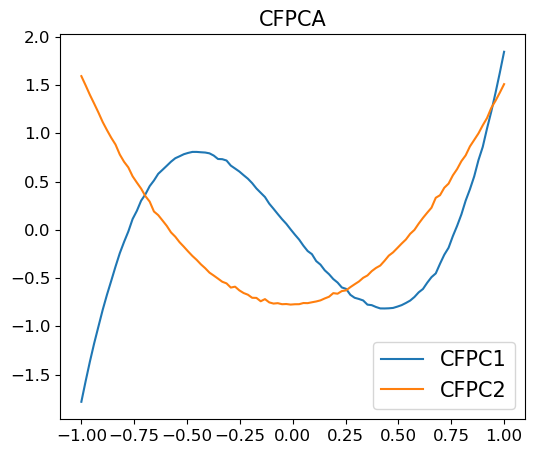

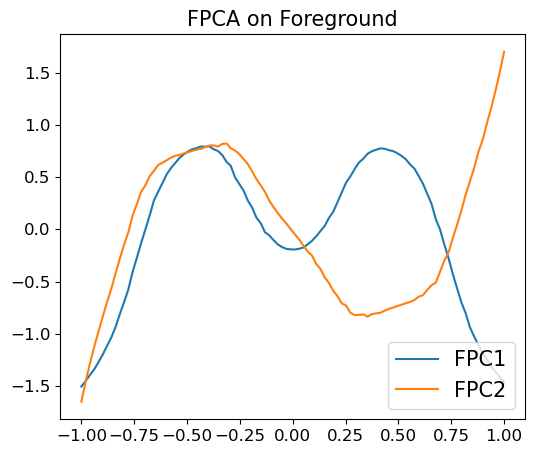

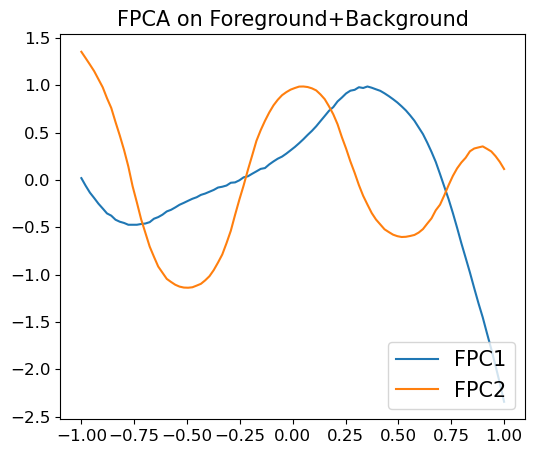

In [9]:
#---------------Figure 2 plots-------------------------
np.random.seed(1)
N,M = 100000,100000
X, Y = generate_observations_sim1(t,N,M,error_func) 
components_XY = CFPCA(X+Y,Y,0,t,False, True)
components_X = CFPCA(X,Y,0,t,False, True)
component_CFPCA = CFPCA(X,Y,1,t,False, True)

plt.figure(figsize = (6,5))
plt.plot(t, component_CFPCA[:,0])
plt.plot(t, component_CFPCA[:,1])
plt.legend(['CFPC1', 'CFPC2'], loc = "lower right", fontsize = 15)
plt.title("CFPCA", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


plt.figure(figsize = (6,5))
plt.plot(t, components_X[:,0])
plt.plot(t, components_X[:,1])
plt.legend(['FPC1', 'FPC2'], loc = "lower right", fontsize = 15)
plt.title("FPCA on Foreground", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.figure(figsize = (6,5))
plt.plot(t, components_XY[:,0])
plt.plot(t, components_XY[:,1])
plt.legend(['FPC1', 'FPC2'], loc = "lower right", fontsize = 15)
plt.title("FPCA on Foreground+Background", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [10]:
#-------------Table 1, Simulation 1---------------------
np.random.seed(1)

def run_simulation_table(n_simulations, t, N, M):
    fpc1_X = []
    fpc2_X = []
    
    fpc1_XY = []
    fpc2_XY = []
    
    cfpc1 = []
    cfpc2 = []

    for _ in range(n_simulations):
        X, Y = generate_observations_sim1(t,N,M,error_func) 
        components_XY = CFPCA(X+Y,Y,0,t,False, True)
        components_X = CFPCA(X,Y,0,t,False, True)
        component_CFPCA = CFPCA(X,Y,1,t,False, True)
        #plt.plot(t,component_CFPCA[:,0])
        #plt.plot(t,component_CFPCA[:,1])
        
        fpc1_XY1 = l2_distance(w2,components_XY[:,0], t)
        fpc2_XY2 = l2_distance(w1,components_XY[:,1], t)
        
        fpc1_X1 = l2_distance(w2,components_X[:,0], t)
        fpc2_X2 = l2_distance(w1,components_X[:,1], t)
        
        cfpc1_1 = l2_distance(w2,component_CFPCA[:,0], t)
        cfpc2_2 = l2_distance(w1,component_CFPCA[:,1], t)
        
        fpc1_XY.append(fpc1_XY1)
        fpc2_XY.append(fpc2_XY2)
        
        fpc1_X.append(fpc1_X1)
        fpc2_X.append(fpc2_X2)
        
        
        cfpc1.append(cfpc1_1)
        cfpc2.append(cfpc2_2)
    
    avg_fpc1_XY = np.mean(fpc1_XY)
    avg_fpc2_XY = np.mean(fpc2_XY)
    
    avg_fpc1_X = np.mean(fpc1_X)
    avg_fpc2_X = np.mean(fpc2_X)
    
    avg_cfpc1 = np.mean(cfpc1)
    avg_cfpc2 = np.mean(cfpc2)
    
    return avg_cfpc1, avg_cfpc2, avg_fpc1_XY, avg_fpc2_XY, avg_fpc1_X, avg_fpc2_X


ns = [100000]
n_simulations =  40
t = np.linspace(-1, 1, 100)  

results = {'N': [], 'cfpc1': [], 'cfpc2': [], 'fpc1_XY': [], 'fpc2_XY': [],'fpc1_X': [], 'fpc2_X': []}


for n in ns:
    a,b,c,d,e,f= run_simulation_table(n_simulations, t, n, n)
    results['N'].append(n)
    results['cfpc1'].append(a)
    results['cfpc2'].append(b)
    results['fpc1_XY'].append(c)
    results['fpc2_XY'].append(d)
    results['fpc1_X'].append(e)
    results['fpc2_X'].append(f)
    
print("CFPC1: " + str(np.mean(results['cfpc1'])))
print("CFPC2: " + str(np.mean(results['cfpc2'])))
print("FPC1_X: " + str(np.mean(results['fpc1_X'])))
print("FPC2_X: " + str(np.mean(results['fpc2_X'])))
print("FPC1_XY: " + str(np.mean(results['fpc1_XY'])))
print("FPC2_XY: " + str(np.mean(results['fpc2_XY'])))

CFPC1: 0.05659200444165251
CFPC2: 0.06708015835609413
FPC1_X: 1.4069691988814914
FPC2_X: 1.3901851489503056
FPC1_XY: 0.8081129289180196
FPC2_XY: 1.3024658711019144


In [11]:
#Simulation 1 FIGURE

def run_simulation_figure(n_simulations, t, N, M):
    
    cfpc1 = []
    cfpc2 = []

    for _ in range(n_simulations):
        X, Y = generate_observations_sim1(t,N,M,error_func) #switch sim number
        component_CFPCA = CFPCA(X,Y,1,t,False, True)
        #plt.plot(t,component_CFPCA[:,0])
        #plt.plot(t,component_CFPCA[:,1])
        
        cfpc1_1 = l2_distance(w2,component_CFPCA[:,0], t)
        cfpc2_2 = l2_distance(w1,component_CFPCA[:,1], t)
        
        cfpc1.append(cfpc1_1)
        cfpc2.append(cfpc2_2)
    
    
    return cfpc1,cfpc2


ns = [8100,22000,60000,162000,442000,1200000]  

n_simulations =  40
t = np.linspace(-1, 1, 100)  

all_distances_cfpc1 = []
all_distances_cfpc2 = []

# Collect all distances
for n in ns:
    distances_cfpc1, distances_cfpc2 = run_simulation_figure(n_simulations, t, n, n)
    all_distances_cfpc1.append(distances_cfpc1)
    all_distances_cfpc2.append(distances_cfpc2)


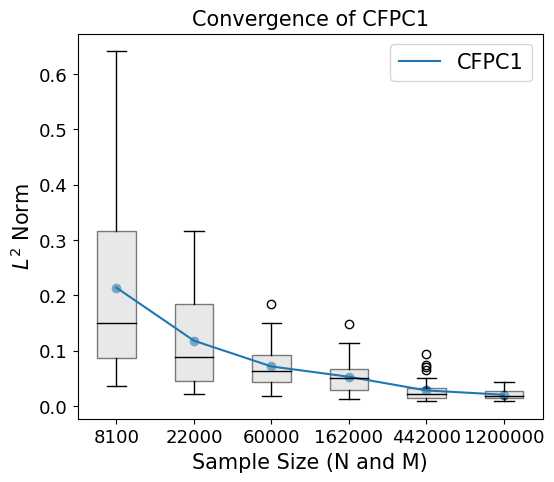

In [12]:
fig, ax = plt.subplots(figsize=(6, 5))

line_color_cfpc1 = '#1f77b4'
line_color_cfpc2 = '#ff800f'

# Plotting boxplots and means for CFPC1
bp_cfpc1 = plot_boxplot_with_overlayed_mean(ax, all_distances_cfpc1, range(1, len(ns)+1), line_color_cfpc1, 'CFPC1')
ax.set_xticks(range(1, len(ns)+1))
ax.set_xticklabels(ns)
plt.tick_params(axis='x', labelsize=13)  
plt.tick_params(axis='y', labelsize=13)  

ax.set_xlabel('Sample Size (N and M)', fontsize = 15)
ax.set_ylabel(r'$L^2$ Norm', fontsize=15)
plt.title("Convergence of CFPC1", fontsize = 15)
ax.legend(fontsize = 15)




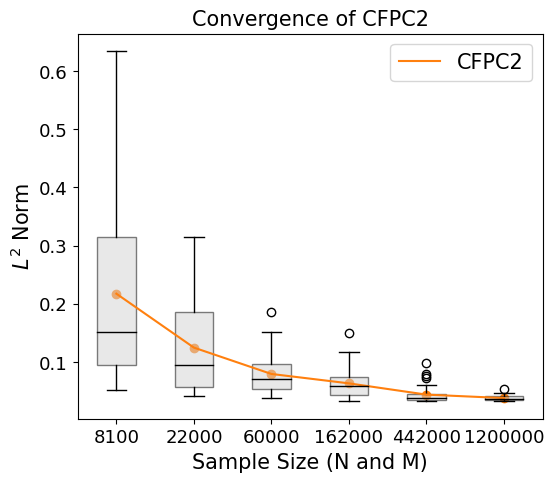

In [13]:
fig, ax = plt.subplots(figsize=(6, 5))

line_color_cfpc1 = '#1f77b4'
line_color_cfpc2 = '#ff800f'

# Plotting boxplots and means for CFPC1
bp_cfpc1 = plot_boxplot_with_overlayed_mean(ax, all_distances_cfpc2, range(1, len(ns)+1), line_color_cfpc2, 'CFPC2')
ax.set_xticks(range(1, len(ns)+1))
ax.set_xticklabels(ns)
plt.tick_params(axis='x', labelsize=13)  
plt.tick_params(axis='y', labelsize=13)  

ax.set_xlabel('Sample Size (N and M)', fontsize = 15)
ax.set_ylabel(r'$L^2$ Norm', fontsize=15)
plt.title("Convergence of CFPC2", fontsize = 15)
ax.legend(fontsize = 15)




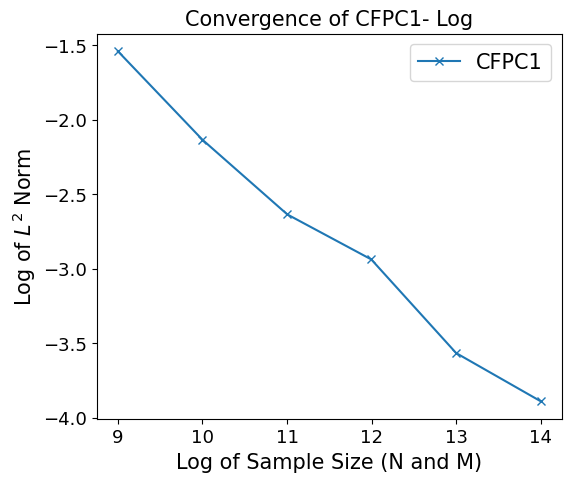

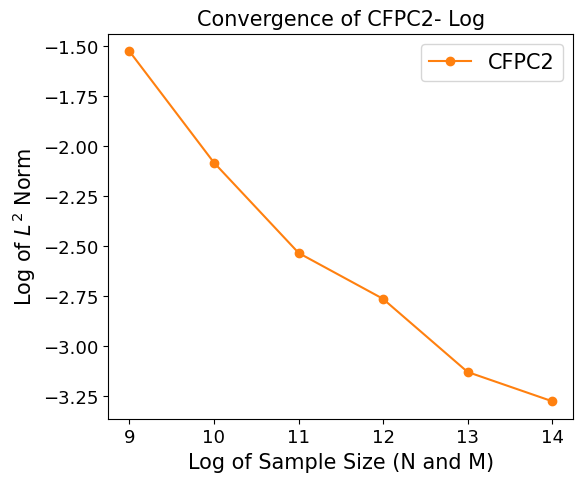

In [14]:
log_means_cfpc1 = [np.log(np.mean(distances)) for distances in all_distances_cfpc1]
log_means_cfpc2 = [np.log(np.mean(distances)) for distances in all_distances_cfpc2]

# Calculate the log of the sample sizes
log_ns = np.log(ns)

# Define the colors for the lines
line_color_cfpc1 = '#1f77b4'  # Blue
line_color_cfpc2 = '#ff800f'  # Orange

# Plotting the log-log plot for CFPC1
plt.figure(figsize=(6, 5))
plt.plot(log_ns, log_means_cfpc1, marker='x', linestyle='-', color=line_color_cfpc1, label='CFPC1')
plt.xlabel('Log of Sample Size (N and M)', fontsize = 15)
plt.ylabel(r'Log of $L^2$ Norm', fontsize=15)
plt.title("Convergence of CFPC1- Log", fontsize = 15)

plt.tick_params(axis='x', labelsize=13)  
plt.tick_params(axis='y', labelsize=13)  

plt.legend(fontsize = 15)
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(log_ns, log_means_cfpc2, marker='o', linestyle='-', color=line_color_cfpc2, label='CFPC2')
plt.xlabel('Log of Sample Size (N and M)', fontsize = 15)
plt.ylabel(r'Log of $L^2$ Norm', fontsize=15)
plt.title("Convergence of CFPC2- Log", fontsize = 15)

plt.tick_params(axis='x', labelsize=13)  
plt.tick_params(axis='y', labelsize=13)  

plt.legend(fontsize = 15)
plt.show()
